Sigmoids are cool!

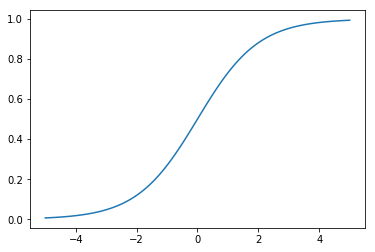

In [98]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-5,5,100)
g=1.0/(1+np.power(np.e,-x))

plt.plot(x,g)
plt.show()

That's the beautiful curve of a sigmoid! As the x-value increases the y-value assymptotically approaches 1, and as the x-value decreases, the y-value approaches 0. If 1 represents 'yes' and 0 represents 'no' it's almost as if we can pose questions to our sigmoid overlords! Word on the street is ReLU is better these days... but I wouldn't know nothin' 'bout that.

Let's generate some 0's and some 1's!

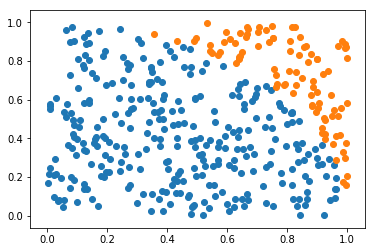

In [99]:
my0x = []
my0y = []
my1x = []
my1y = []

for i in range(400):
    x = np.random.random()
    y = np.random.random()
    if(x**2+y**2 < 1):
        my0x.append(x)
        my0y.append(y)
    else:
        my1x.append(x)
        my1y.append(y)
        
plt.scatter(my0x,my0y)
plt.scatter(my1x,my1y)
plt.show()

In [100]:
len(my0x)

306

In [101]:
## here we build X
myVec1=[]
myVec2=[]

for i in range(0,len(my0x)):
    myVec1.append(my0x[i])
    myVec2.append(my0y[i])

for i in range(0,len(my1x)):
    myVec1.append(my1x[i])
    myVec2.append(my1y[i])

X=np.matrix([np.ones(len(my0x)+len(my1x)),myVec1,myVec2]).T
X.shape

(400, 3)

In [102]:
## Here we build y
y=[]
for i in range(0,len(my0x)):
    y.append(0)

for i in range(0,len(my1x)):
    y.append(1)

y=np.matrix(y).T
y.shape

(400, 1)

In [103]:
theta=np.matrix(np.zeros(3))
theta.shape

(1, 3)

In [104]:
def fitIt(X,y,alpha,iters):
    theta=np.matrix(np.zeros(3))
    temp=np.matrix(np.zeros(3))
    for i in range(iters):
        diff = 1.0/(1+np.power(np.e,-X*theta.T))-y
        for j in range(3):
            temp.T[j]=np.sum(np.multiply(diff,X[:,j]))
        theta=theta-alpha*temp
    return theta

In [105]:
myModel= fitIt(X,y,0.0002,10000)

In [113]:
1.0/(1+np.power(np.e,-np.matrix([[1,0.9,0.5]])*myModel.T))

matrix([[ 0.61961083]])

In [107]:
def test(x,y):
    myVal = 1.0/(1+np.power(np.e,-np.matrix([[1,x,y]])*myModel.T))
    if(myVal>=0.5):
        print("I think that's outisde the circle")
    else:
        print("I think that's inside the circle")

In [108]:
test(0,0)

I think that's inside the circle


In [109]:
test(0.5,0.5)

I think that's inside the circle


In [110]:
test(0.8,0.8)

I think that's outisde the circle


In [111]:
test(0.8,0.2)

I think that's inside the circle


In [116]:
test(0.8,0.6)

I think that's outisde the circle


In [117]:
test(0.4,0.9) ## Oh no! It's not that smart...

I think that's inside the circle


In [120]:
myCoef=myModel.tolist()[0]
myCoef

[-10.26769043840003, 8.071358778895025, 6.98272855249287]

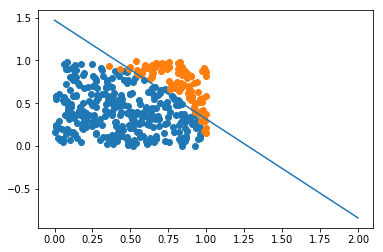

In [122]:
myX = np.linspace(0,2,100)
myY = -(myCoef[0]+myCoef[1]*myX)/myCoef[2]

plt.scatter(my0x,my0y)
plt.scatter(my1x,my1y)
plt.plot(myX,myY)
plt.show()

Woohoo! It definitely learned something! That's incredible ain't it!